<a href="https://colab.research.google.com/github/sheelasapkota59/image-similarity-model/blob/main/similarity_check_multp_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import cv2
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense , Input , Lambda
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [11]:

# from google.colab import files
# uploaded = files.upload()


In [63]:
#load resnet50
base_model = ResNet50(weights = 'imagenet' , include_top= False , pooling='avg')


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [59]:
def feature_Extraction(img_path):
  img = cv2.imread(img_path)

  if img is None:
    raise ValueError(f"Couldnot load image from the path {img_path}")

  img = cv2.resize(img , (224 , 224))
  img  = preprocess_input(img)
  img = np.expand_dims(img , axis = 0) #output= (1, 224 , 224 , 3) , 1 is batch-size. images after using batch size (batch_size, height, width, channels) , just the img (224, 224, 3)
  features = base_model.predict(img)
  return features.flatten()

In [75]:
#build siamese model
def build_siamese_model_network():
  input_shape = (2048,)
  input_a = Input(shape=input_shape)
  input_b = Input(shape=input_shape)

  l1_layer = Lambda(lambda tensors : tf.abs(tensors[0] - tensors[1]))
  l1_distance = l1_layer([input_a , input_b])

  output = Dense(1 , activation='sigmoid')(l1_distance)
  model = Model(inputs = [input_a , input_b] , outputs = output)
  model.compile(loss = 'binary_crossentropy' , optimizer= 'adam' , metrics = ['accuracy'])
  return model

In [58]:
# images = {'/content/road1.png' : 1,
#  '/content/road2.png' : 1,
#  '/content/tiger1.png' : 2,
#   '/content/tiger2.png' : 2
#           }


images = {
    path: 1 if "road" in path else 2 for path in images_path
}

In [61]:
#create pairs and labels

x1 , x2 , y = [], []  , []
images_path = list(images.keys())

In [64]:
for i in range(len(images_path)):
    for j in range(i + 1, len(images_path)):
        img1 = images_path[i]
        img2 = images_path[j]
        f1 = feature_Extraction(img1)
        f2 = feature_Extraction(img2)

        # Continue with similarity check or model input
        label = 1 if images[img1] == images[img2] else 0
        x1.append(f1)
        x2.append(f2)
        y.append(label)



1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [76]:
x1, x2, y = np.array(x1), np.array(x2), np.array(y)

# Train model
model = build_siamese_model_network()
history = model.fit([x1, x2], y, epochs=18, batch_size=2, verbose=1)



Epoch 1/18
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0833 - loss: 0.8584     
Epoch 2/18
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5833 - loss: 0.5520
Epoch 3/18
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7708 - loss: 0.3219
Epoch 4/18
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4583 - loss: 0.6366    
Epoch 5/18
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8542 - loss: 0.2201
Epoch 6/18
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9167 - loss: 0.1574
Epoch 7/18
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9167 - loss: 0.1334
Epoch 8/18
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.2361
Epoch 9/18
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.2093
Epoch 10/18
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.1054
Epoch 11/18
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 1.0000 - loss: 0.1131
Epoch 12/18
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss

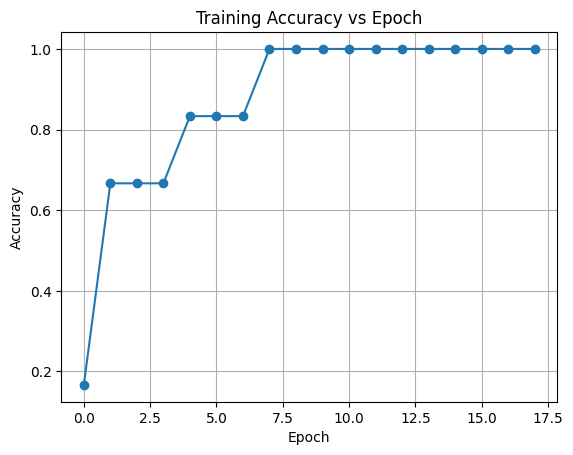

In [77]:
# Plot accuracy vs epoch
plt.plot(history.history['accuracy'], marker='o')
plt.title("Training Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
